<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [70]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [71]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [72]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [73]:
def tokenize(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_space == False) and (token.is_alpha == True) and \
            (token.is_stop == False) and (token.is_punct == False) \
            and (token.pos_!= 'PRON')): # and (token.text.strip() not in STOP_WORDS)):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [9]:
tokenize(yelp.text[0])

['beware',
 'fake',
 'fake',
 'fake',
 'small',
 'business',
 'los',
 'alamitos',
 'receive',
 'look',
 'like',
 'legitimate',
 'bill',
 'account',
 'number',
 'call',
 'phone',
 'number',
 'list',
 'wait',
 'time',
 'hold',
 'say',
 'minute',
 'leave',
 'message',
 'live',
 'person',
 'phone',
 'matter',
 'number',
 'select',
 'leave',
 'firm',
 'message',
 'contact',
 'bbb',
 'attorney',
 'company',
 'try',
 'scam',
 'business',
 'illegal']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

1. Create a vector representation of the reviews

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [11]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english', min_df=0.025, max_df=.95, ngram_range=(1,2))
# tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.95, ngram_range=(1,2))

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(yelp.text)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,10,15,20,30,able,absolutely,actually,ago,amazing,area,...,wonderful,work,working,worst,worth,wouldn,wrong,year,years,yelp
0,0.0,0.000000,0.239091,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.123631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146278,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.298333,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.225699,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [13]:
fake_review = ["""This place was the absolute worst. I told them I wanted my oil
                chaged and my tires rotated and the lady at the counter said they
                only serve pizza. I said they're both round but she said, with a
                lot of attitude I might add, that's not how it works. I told her
                in no uncertain terms and very loudly she was stupid and I was
                being inconvenienced. 2/5."""]

In [16]:
nn  = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)
new = tfidf.transform(fake_review)
similar_reviews = nn.kneighbors(new.todense())

In [34]:
for review in similar_reviews[1][0].tolist():
    print(f'Review Number {review}\n {yelp.text[review]}\n')

Review Number 1188
 It is the worst airport limo service. I have had great experience with them in the past. But I used their service 5-6 months ago and it was the worst possible. I called the cab around 4:20. Their policy allows a waiting time of 10 minutes. I was inside the cab at 4:27 PM. The driver said extra charge. I said for what? And then he made me call the customer service at 4:28. The representative stated the policy, I said I am calling you from inside the cab at 4:28. How is it possible for me to be late in any way? We debated over the charge. I was not willing to pay a penny. He said I have to trust the driver. I was thinking how dumb are you? I mean how was it possible for me to be sitting with the driver in the cab 2 minutes before the charge applies, and am even talking to you! If it had been 4:30, yes I would pay based on their policy. He said if you can afford $5, which I am sure you cannot afford, pay it. I said I cannot afford it. It was not about the money but abt

These reviews are uncannily accurate. Especially reivew 469.

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
# Create Pipeline Components
vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()
# Define the Pipeline
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect), 
                 # Classifier
                 ('clf', rfc)
                ])

In [38]:
%%time
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   45.6s finished


CPU times: user 2.64 s, sys: 663 ms, total: 3.31 s
Wall time: 46.5 s


In [41]:
print(f'Best score is {grid_search.best_score_*100:0.1f}%')

Best score is 54.1%


In [45]:
print(f'Predicted score is {grid_search.predict(fake_review)[0]}')

Predicted score is 1


Stretch goal - compare to CountVectorizer

In [69]:
vect_count = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()
# Define the Pipeline
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect_count), 
                 # Classifier
                 ('clf', rfc)
                ])

In [74]:
%%time
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search_count = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_count.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   48.6s finished


CPU times: user 3.13 s, sys: 742 ms, total: 3.87 s
Wall time: 49.6 s


In [75]:
print(f'Best score is {grid_search_count.best_score_*100:0.1f}%')
print(f'Predicted score is {grid_search_count.predict(fake_review)[0]}')

Best score is 54.1%
Predicted score is 1


No difference between TFID and Count vectorization.

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.

In [49]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamulticore import LdaMulticore

Learn the vocubalary of the yelp data:

In [48]:
%%time
yelp['lemma'] = yelp.text.apply(tokenize)
id2word = corpora.Dictionary(yelp.lemma)

CPU times: user 4min 45s, sys: 8.48 s, total: 4min 53s
Wall time: 2min 50s


Create a bag of words representation of the entire corpus

In [50]:
%%time
corpus = [id2word.doc2bow(text) for text in yelp.lemma]

CPU times: user 278 ms, sys: 59 µs, total: 278 ms
Wall time: 277 ms


Your LDA model should be ready for estimation: 

In [52]:
%%time
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10, # You can change this parameter
                   random_state=723812,
                   passes=10
                  )

CPU times: user 22.2 s, sys: 1.33 s, total: 23.5 s
Wall time: 12.1 s


2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 

Create 1-2 visualizations of the results

In [53]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
%%time
pyLDAvis.gensim.prepare(lda, corpus, id2word)

In [61]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
#     tokens = list(doc_stream(path))
    tokens = yelp.lemma
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
#             stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [ ]:
%%time
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
#                                                         path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=20)

In [66]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

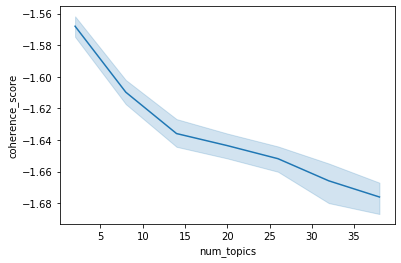

In [67]:
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

Most of the yelp review are about food and most have a positive bent. This is initially surprising since I think those with a complaint are more likely to make an effort to leave a review. However, on reflection, the local nature of yelp may mean people are more likely to advocate for the good place where they live or visit. People may also be inclined to be positive about a place they've already given money to.

The coherence score graph shows very negative scores. Ever moreso than the one from lecture. Therefore I think it has limited use.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)